<a href="https://colab.research.google.com/github/mb1te/SMPR/blob/main/SMPR_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЗАДАНИЕ 9. Наивный нормальный байесовский классификатор.**

- Реализовать наивный байессовский классификатор
- Сделать чертеж, демонстрирующий работу метода

Предположим, что все признаки $f_j$ являются независимыми случайными величинами. То есть $p_y(x) = p_{y_1}(\xi_1) \cdot p_{y_2}(\xi_2) ... \cdot p_{y_n} (\xi_n)$.

Оценивать $n$ одномерных плотностей гораздо проще, чем одну $n$-мерную.

Оптимальный байессовский классификатор: $a(x) = arg \min\limits_{s\in Y} \sum\limits_{y \in Y} \lambda_{ys}P_y \, p_y(x)$.

Если известны $P_y, p_y(x), \lambda_{yy}=0, \lambda_{ys} \equiv \lambda$, то: $a(x) = arg \max\limits_{y\in Y} \lambda_{y}P_y \, p_y(x)$

Подставим эмпирические оценки плотностей $\hat{p_{yj}} (\xi)$: $a(x) = arg \max\limits_{y \in Y} \left(ln \lambda_y \hat{P_y} + \sum\limits_{j = 1}^n ln \hat{p_{yj}} (\xi_j)\right)$.

В случае нормального распределения для эмпирической оценки плотностей необходимо для каждого класса посчитать математическое ожидание и стандартное отклонение.

In [ ]:
import numpy as np
"""
Класс реализует наивный нормальный байессовский классификатор.
"""
class NaiveBayesNormalClassifier():
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.train()

  """
  Плотность нормального распределения
  """
  @staticmethod
  def gauss(x, mu, sigma):
    return (np.exp(-(x-mu)**2 / (2 * sigma**2))) / (np.sqrt(2 * np.pi * sigma**2))

  """
  Подсчет матожидания, стандартного отклонения и приорных вероятностей
  """
  def train(self):
    self.classes = pd.unique(self.y)
    self.mu = {}
    self.sigma = {}
    
    for c in self.classes:
      self.mu[c] = np.array(self.X.iloc[self.y[self.y == c].index].mean())
      self.sigma[c] = np.array(self.X.iloc[self.y[self.y == c].index].std())
      
    self.prior = {}
    for c in self.classes:
      self.prior[c] = len(self.y[self.y == c]) / len(self.X)

  """
  Классификация объекта. Все lambda были приняты за 1.
  """
  def predict(self, obj):
    posteriors = []
    classes = []

    for c in self.classes:
      prior = np.log(self.prior[c])
      mu = self.mu[c]
      sigma = self.sigma[c]
      posterior = prior + np.sum(np.log(self.gauss(obj, mu, sigma)))
      posteriors.append(posterior)
      classes.append(c)
    
    return classes[np.argmax(posteriors)]

Сгенерируем выборку:

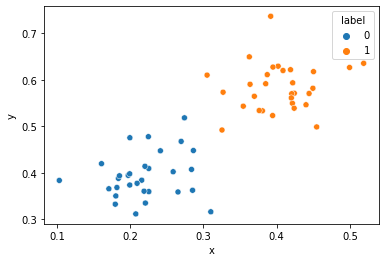

In [ ]:
import numpy as np
import pandas as pd

GROUP_SIZE = 30


"""
Функция generate_array генерирует массив точек заданного размера 
согласно заданным параметрам нормального распределения
"""
def generate_array(m1, d1, m2, d2,  size=GROUP_SIZE):
  return np.concatenate(
    (
      np.random.normal(m1, d1, size=size),
      np.random.normal(m2, d2, size=size)
    )
  )


df = pd.DataFrame(
  {
    'x': generate_array(0.2, 0.05, 0.4, 0.05),
    'y': generate_array(0.4, 0.05, 0.6, 0.05),
    'label': np.array([0] * GROUP_SIZE + [1] * GROUP_SIZE)
  }
)

X = df[['x', 'y']]
y = df.label

import seaborn as sns
sns.scatterplot(data=df, x='x', y='y', hue='label')

Нарисуем карту классификации:

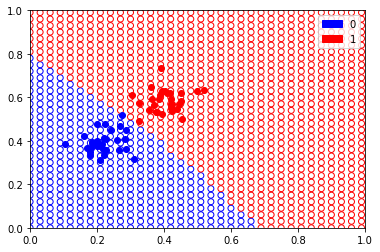

In [ ]:
BC = NaiveBayesNormalClassifier(X, y)
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch, Circle
from matplotlib.markers import MarkerStyle

i, j = 'x', 'y'
color = {0: 'blue', 1: 'red'}
fig, ax = plt.subplots()

for xi in np.arange(0, 1, 0.03):
  for yi in np.arange(0, 1, 0.03):
    cat = BC.predict([xi, yi])
    plt.scatter(xi, yi, color='none', edgecolor=color[cat])

for ind in range(len(X)):
  xi = X[i].values[ind]
  yi = X[j].values[ind]
  cat = y.values[ind]
  clr = color[cat]
  plt.scatter(xi, yi, color=clr)

plt.legend(handles=[Patch(color=color[key], label=key) for key in color])

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Преимущества алгоритма:

- Простота реализации и низкие вычислительные затраты при обучении и классификации.
- Если признаки независимы, то высокое качество классификации

Недостатки алгоритма:

- Если признаки зависимы, то низкое качество классификации